# K-means & ensemble

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 상권 데이터
상권 = pd.read_csv('https://raw.githubusercontent.com/ecothonCBB/CigaretteButtBins/main/data/%EC%84%9C%EC%9A%B8%EC%83%81%EA%B6%8C_%EC%9D%B8%EA%B5%AC_%EC%9C%84%EA%B2%BD%EB%8F%84(%EC%88%98%EC%A0%95).csv')
# 담배 소매인 데이터
소매인 = pd.read_csv('https://raw.githubusercontent.com/ecothonCBB/CigaretteButtBins/main/data/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%90%E1%85%B3%E1%86%A8%E1%84%87%E1%85%A7%E1%86%AF%E1%84%89%E1%85%B5_%E1%84%86%E1%85%A1%E1%84%91%E1%85%A9%E1%84%80%E1%85%AE_%E1%84%83%E1%85%A1%E1%86%B7%E1%84%87%E1%85%A2%E1%84%89%E1%85%A9%E1%84%86%E1%85%A2%E1%84%8B%E1%85%B5%E1%86%AB_%E1%84%8C%E1%85%B5%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%92%E1%85%A7%E1%86%AB%E1%84%92%E1%85%AA%E1%86%BC_20220823.csv', encoding='CP949')
# 흡연구역
흡연구역 = pd.read_csv('https://raw.githubusercontent.com/ecothonCBB/CigaretteButtBins/main/data/%E1%84%86%E1%85%A1%E1%84%91%E1%85%A9%E1%84%80%E1%85%AE_%E1%84%92%E1%85%B3%E1%86%B8%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%80%E1%85%AE%E1%84%8B%E1%85%A7%E1%86%A8_with%E1%84%8B%E1%85%B1%E1%84%80%E1%85%A7%E1%86%BC%E1%84%83%E1%85%A9.csv')
# 무단 투기지역
투기지역 = pd.read_csv('https://raw.githubusercontent.com/ecothonCBB/CigaretteButtBins/main/data/%E1%84%86%E1%85%A1%E1%84%91%E1%85%A9%E1%84%80%E1%85%AE_%E1%84%90%E1%85%AE%E1%84%80%E1%85%B5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A7%E1%86%A8_with%E1%84%8B%E1%85%B1%E1%84%80%E1%85%A7%E1%86%BC%E1%84%83%E1%85%A9.csv')
# 꽁초 쓰레기통
쓰레기통 = pd.read_csv('https://raw.githubusercontent.com/ecothonCBB/CigaretteButtBins/main/data/%EC%93%B0%EB%A0%88%EA%B8%B0%ED%86%B5_%EC%9C%84%EA%B2%BD%EB%8F%84/%EB%A7%88%ED%8F%AC%EA%B5%AC_%EB%8B%B4%EB%B0%B0%EA%BD%81%EC%B4%88%EC%93%B0%EB%A0%88%EA%B8%B0%ED%86%B5_%EC%9C%84%EA%B2%BD%EB%8F%84.csv')

상권.shape, 소매인.shape, 흡연구역.shape, 투기지역.shape, 쓰레기통.shape

((6674, 14), (745, 19), (283, 10), (4, 7), (65, 8))

In [3]:
상권.head()

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,시도명,시군구_코드,시군구명,행정동_코드,행정동명,위도,경도
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,112658,서울,11680,강남구,580,삼성1동,37.511003,127.060059
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,112779,서울,11680,강남구,580,삼성1동,37.511003,127.060059
2,2022,2,U,관광특구,1001496,강남 마이스 관광특구,106859,서울,11680,강남구,580,삼성1동,37.511003,127.060059
3,2022,1,U,관광특구,1001496,강남 마이스 관광특구,92815,서울,11680,강남구,580,삼성1동,37.511003,127.060059
4,2022,4,U,관광특구,1001495,잠실 관광특구,3632727,서울,11710,송파구,566,오륜동,37.516476,127.115275


In [4]:
상권 = 상권.loc[상권['시군구명'] == '마포구'].reset_index()
상권.head()

,index,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,시도명,시군구_코드,시군구명,행정동_코드,행정동명,위도,경도
0,536,2022,4,R,전통시장,2130198,아현시장,262986,서울,11440,마포구,555,아현동,37.556149,126.953927
1,537,2022,3,R,전통시장,2130198,아현시장,256178,서울,11440,마포구,555,아현동,37.556149,126.953927
2,538,2022,2,R,전통시장,2130198,아현시장,270367,서울,11440,마포구,555,아현동,37.556149,126.953927
3,539,2022,1,R,전통시장,2130198,아현시장,251710,서울,11440,마포구,555,아현동,37.556149,126.953927
4,540,2022,4,R,전통시장,2130197,마포시장,51964,서울,11440,마포구,555,아현동,37.544995,126.953515


In [5]:
상권 = 상권[['위도', '경도']].drop_duplicates().reset_index()
상권 = 상권.drop('index', axis=1)
상권.head()

,위도,경도
0,37.556149,126.953927
1,37.544995,126.953515
2,37.544544,126.952825
3,37.539632,126.949739
4,37.541242,126.942259


In [6]:
소매인 = 소매인[['위도', '경도']]
소매인.head()

,위도,경도
0,37.549171,126.960855
1,37.538740,126.946219
2,37.552109,126.915675
3,37.541397,126.945188
4,37.550726,126.958522


## 흡연구역 & 상권 연관성 분석

In [7]:
import folium
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# 흡연구역 데이터
smoking_areas = 흡연구역[['위도', '경도']]

# 유사도 메트릭스 생성
def calculate_similarity(lat1, lon1, lat2, lon2):
    coords_1 = [radians(lat1), radians(lon1)]
    coords_2 = [radians(lat2), radians(lon2)]
    distance = haversine_distances([coords_1, coords_2])

    return distance[0][1]

# 흡연구역과 상권 간의 연관성 계산
similarity_matrix = []
for _, main_row in smoking_areas.iterrows():
    similarities = []
    for _, target_row in 상권.iterrows():
        similarity = calculate_similarity(main_row['위도'], main_row['경도'], target_row['위도'], target_row['경도'])
        similarities.append(similarity)
    similarity_matrix.append(similarities)

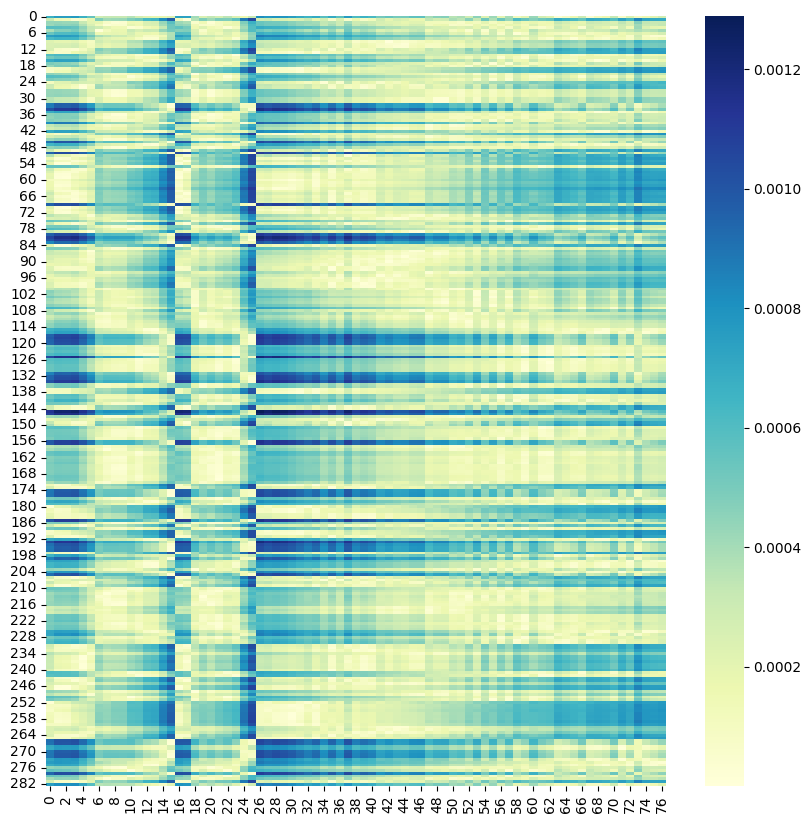

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap="YlGnBu")
plt.show()

In [9]:
# 유사도 메트릭스 시각화
m = folium.Map(location=[37.56070556, 126.9105306], zoom_start=14, width = 1300, height = 700)

for i in range(len(smoking_areas)):
    min_similarity = float('inf')
    min_index = -1
    for j in range(len(상권)):
        similarity = similarity_matrix[i][j]
        if similarity < min_similarity:
            min_similarity = similarity
            min_index = j
    target_row = 상권.iloc[min_index]
    folium.CircleMarker(
        location=[target_row['위도'], target_row['경도']],
        radius=5,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=min_similarity*10000,  # 유사도에 따라 색상의 투명도 조절(명확한 대비를 위해 값을 크게 설정 *10000)
    ).add_to(m)

m

## 흡연구역 & 소매인 연관성 분석

In [10]:
import folium
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# 흡연구역 데이터
smoking_areas = 흡연구역[['위도', '경도']]

# 유사도 메트릭스 생성
def calculate_similarity(lat1, lon1, lat2, lon2):
    coords_1 = [radians(lat1), radians(lon1)]
    coords_2 = [radians(lat2), radians(lon2)]
    distance = haversine_distances([coords_1, coords_2])

    return distance[0][1]

# 흡연구역과 소매인 간의 연관성 계산
similarity_matrix = []
for _, main_row in smoking_areas.iterrows():
    similarities = []
    for _, target_row in 소매인.iterrows():
        similarity = calculate_similarity(main_row['위도'], main_row['경도'], target_row['위도'], target_row['경도'])
        similarities.append(similarity)
    similarity_matrix.append(similarities)

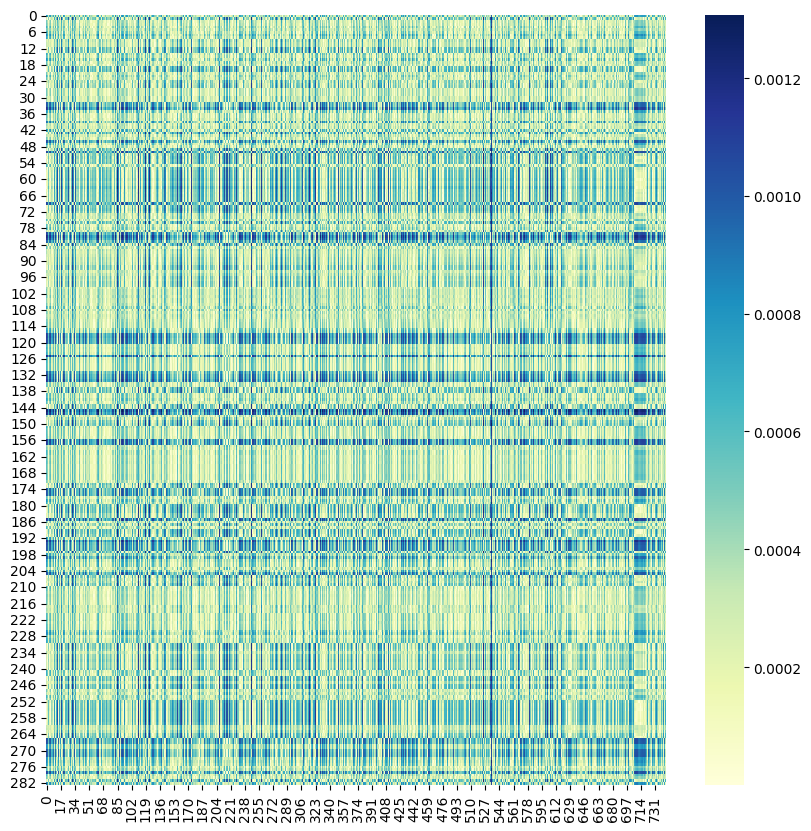

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap="YlGnBu")
plt.show()

In [12]:
# 유사도 메트릭스 시각화
m = folium.Map(location=[37.56070556, 126.9105306], zoom_start=14, width = 1300, height = 700)

for i in range(len(smoking_areas)):
    min_similarity = float('inf')
    min_index = -1
    for j in range(len(소매인)):
        similarity = similarity_matrix[i][j]
        if similarity < min_similarity:
            min_similarity = similarity
            min_index = j
    target_row = 소매인.iloc[min_index]
    folium.CircleMarker(
        location=[target_row['위도'], target_row['경도']],
        radius=5,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=min_similarity*40000,  # 유사도에 따라 색상의 투명도 조절(명확한 대비를 위해 값을 크게 설정 *40000)
    ).add_to(m)

m

## 모델링 구현

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance

# 앙상블 모델을 위한 K-Means 모델 학습
def train_ensemble_models(data, n_models):
    models = []
    for _ in range(n_models):
        kmeans = KMeans(n_clusters=26, init='k-means++', n_init=10)
        kmeans.fit(data)
        models.append(kmeans)
    return models

# 앙상블 모델을 활용한 쓰레기통 위치 추천
def ensemble_recommendation(models, data):
    predictions = []
    for model in models:
        predicted_labels = model.predict(data)
        predictions.append(predicted_labels)
    ensemble_predictions = pd.DataFrame(predictions).mode().values.flatten()
    return ensemble_predictions

# 클러스터 신뢰도 계산
def calculate_cluster_confidence(data, labels):
    cluster_confidence = []
    max_label = int(max(labels))
    for i in range(max_label + 1):
        cluster_points = data[labels.astype(int) == i]
        if len(cluster_points) > 0:  # 데이터가 비어있지 않은 경우에만 처리
            cluster_mean_distance = np.mean(distance.cdist(cluster_points, cluster_points, 'euclidean'))
            cluster_confidence.extend([cluster_mean_distance] * len(cluster_points))
    return cluster_confidence

# 전체 마포구에 대한 쓰레기통 위치 추천
all_data = pd.concat([흡연구역[['위도','경도']], 투기지역[['위도','경도']], 쓰레기통[['위도','경도']], 소매인, 상권])
ensemble_models = train_ensemble_models(all_data[['위도', '경도']], n_models=50)
recommended_labels = ensemble_recommendation(ensemble_models, all_data[['위도', '경도']])

recommended_labels = recommended_labels[:1174]
all_data = all_data.iloc[:1174].reset_index(drop=True)

# 결과 출력
recommended_locations = all_data[['위도', '경도']]
recommended_locations['추천_라벨'] = recommended_labels[:len(recommended_locations)]

# 클러스터 신뢰도 계산
cluster_confidence = calculate_cluster_confidence(recommended_locations[['위도', '경도']], recommended_labels)

# 클러스터 신뢰도가 높은 추천 위치 필터링
threshold = np.percentile(cluster_confidence, 99)  # 상위 1%의 클러스터만 추천
filtered_locations = recommended_locations[cluster_confidence >= threshold]

print(filtered_locations)

            위도          경도  추천_라벨
553  37.564068  126.903259    1.0
554  37.563148  126.925061   17.0
555  37.545185  126.953434    1.0
556  37.554958  126.925966    2.0
557  37.546739  126.937549    1.0
..         ...         ...    ...
628  37.574866  126.891450    2.0
629  37.554748  126.903929   21.0
630  37.554556  126.937261    6.0
631  37.555083  126.927630    2.0
632  37.549973  126.936023    6.0

[80 rows x 3 columns]


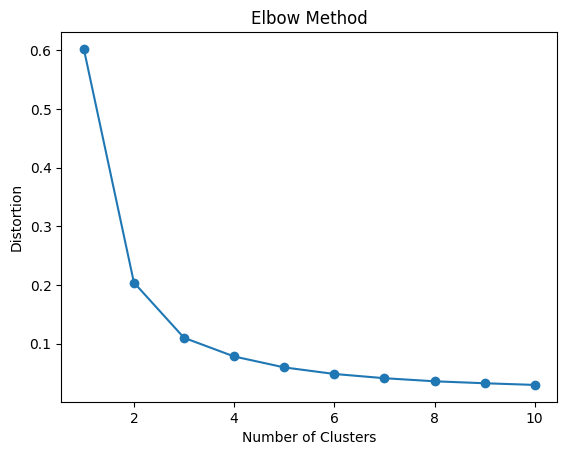

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

# 엘보우 메서드를 통한 최적의 클러스터 개수 찾기
def find_optimal_clusters(data, max_clusters):
    distortions = []
    for n_clusters in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # 그래프 그리기
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# 데이터 준비
all_data = pd.concat([흡연구역[['위도','경도']], 투기지역[['위도','경도']], 쓰레기통[['위도','경도']], 소매인, 상권])

# 최적의 클러스터 개수 찾기
find_optimal_clusters(all_data[['위도', '경도']], max_clusters=10)

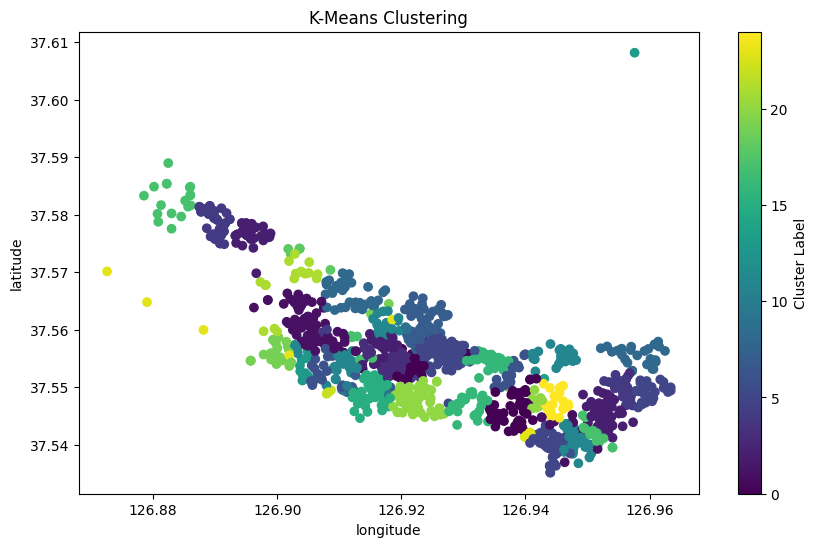

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(all_data['경도'], all_data['위도'], c=recommended_labels, cmap='viridis')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [18]:
import folium

# 지도 생성
map = folium.Map(location=[37.56070556, 126.9105306], zoom_start=13)

# 마포구의 흡연구역 표시
for _, d_row in 흡연구역.iterrows():
    folium.CircleMarker(
        location=[d_row['위도'], d_row['경도']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map)

# # 마포구의 기존 쓰레기통 위치 표시
# for _, s_row in 소매인.iterrows():
#     folium.CircleMarker(
#         location=[s_row['위도'], s_row['경도']],
#         radius=5,
#         color='red',
#         fill=True,
#         fill_color='red'
#     ).add_to(map)

# # 마포구의 기존 쓰레기통 위치 표시
# for _, b_row in 쓰레기통.iterrows():
#     folium.CircleMarker(
#         location=[b_row['위도'], b_row['경도']],
#         radius=5,
#         color='green',
#         fill=True,
#         fill_color='green'
#     ).add_to(map)

# # 마포구의 기존 쓰레기통 위치 표시
# for _, t_row in 투기지역.iterrows():
#     folium.CircleMarker(
#         location=[t_row['위도'], t_row['경도']],
#         radius=5,
#         color='black',
#         fill=True,
#         fill_color='black'
#     ).add_to(map)

# 마포구의 추천된 쓰레기통 위치 표시
for l in range(len(filtered_locations)):
    folium.Marker([filtered_locations[['위도','경도']].iloc[l][0], filtered_locations[['위도','경도']].iloc[l][1]], icon = folium.Icon(color = 'orange', icon = 'trash', prefix='fa')).add_to(map)

# 지도 출력
map